In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import sys
import read_data

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 15})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
# Give component names in the order they apear in the scorep output
components = ["spreadParticleForce", "collideAndStream", "interpolateFluidVelocity", "syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "setExternalVector"]
raw_df = read_data.gen_df("./results", components)

fitting_sizes = ["s0", "s2", "s3", "s5", "s7", "s8"]
testing_sizes = ["s1", "s4", "s6", "s9"]
fitting_df = raw_df[ raw_df['sizestr'].isin(fitting_sizes)]
testing_df = raw_df[ raw_df['sizestr'].isin(testing_sizes)]

In [4]:
total_df

NameError: name 'total_df' is not defined

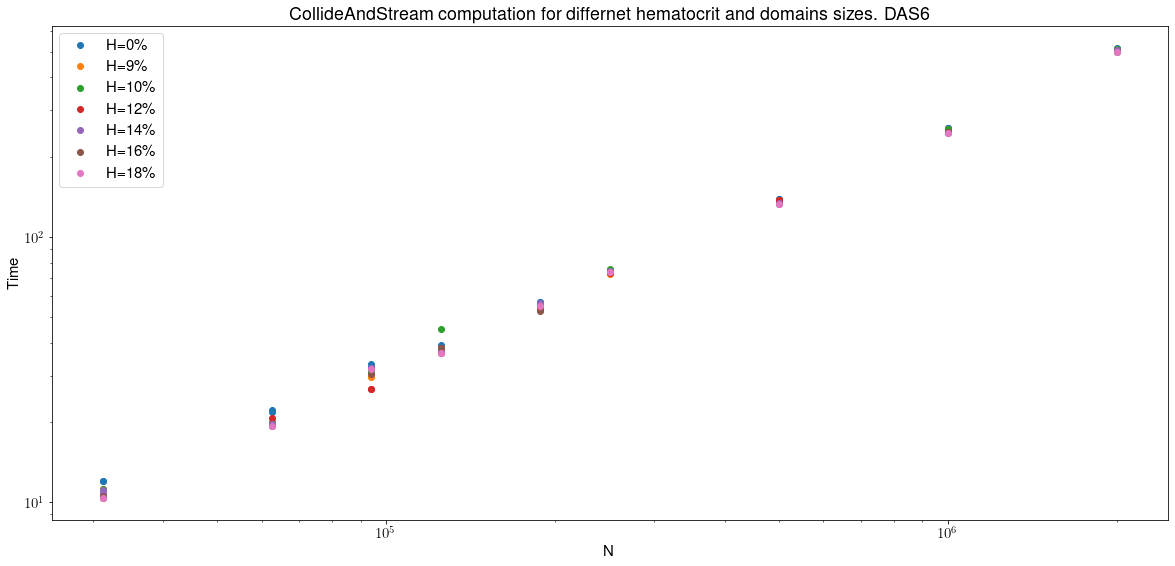

In [5]:
cas_df = raw_df.loc[raw_df['component'] == "collideAndStream"]

sizes = set(cas_df['N'])
Hs = set(cas_df['H'])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


for h in Hs:
    plt.plot(cas_df.loc[cas_df['H'] == h]['N'], cas_df.loc[cas_df['H'] == h]['comp'], 'o', label='H='+str(h)+"\%")
    

ax.set_yscale('log')
ax.set_xscale('log')
plt.title('CollideAndStream computation for differnet hematocrit and domains sizes. DAS6')
plt.xlabel('N')
plt.ylabel("Time")
plt.legend()
plt.show()

In [ ]:
cas_df = raw_df.loc[raw_df['component'] == "collideAndStream"]

sizes = set(cas_df['N'])
Hs = set(cas_df['H'])

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


for h in Hs:
    plt.plot(cas_df.loc[cas_df['H'] == h]['N'], cas_df.loc[cas_df['H'] == h]['comm'], 'o', label='H='+str(h)+"\%")
    

ax.set_yscale('log')
ax.set_xscale('log')
plt.title('CollideAndStream communication for differnet hematocrit and domains sizes. DAS6')
plt.xlabel('N')
plt.ylabel("Time")
plt.legend()
plt.show()